# Note that this project is just an example, it's totally useless, because the features weren't chosen correctly, Please be warned.
# 这个项目的Features选择有问题，仅仅只作为演示Linear Regression的使用而存在，如果想要获得真正有用的模型，请严格考虑与公司相关的Features。

# Importing

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
import file_operations
import os

Use to plot the data

In [2]:
import matplotlib.pyplot as plt

Use to make data look better

In [3]:
from matplotlib import style

Use to specify the style of the plot

In [4]:
style.use('ggplot')

In [5]:
import joblib

# Selecting Files

In [6]:
paths = file_operations.create_project_path("Project 4")

Project directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Project 4'
Project data directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Project 4\Data'
Project output directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Project 4\Output'


In [7]:
target_file_name = "K线导出_600873_日线数据.xlsx"
default_file_path = os.path.join(paths["data_dir"], target_file_name)
stock_df = file_operations.read_and_return_pd_df(default_file_path)
file_operations.change_head_to_ENG(stock_df)
file_operations.change_date_to_datetime(stock_df)
file_operations.change_numerical_data_to_float64(stock_df)
file_operations.change_secu_code_to_str(stock_df)
# Remove rows with NaN in the DATE column
stock_df.dropna(subset=['DATE'], inplace=True)
display(stock_df)
print(stock_df.info())
display(stock_df.tail())

The input file path is: 
d:\Important Files\Repositories\Machine-Learning-Project-related\Project 4\Data\K线导出_600873_日线数据.xlsx
Reading the input file...


,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
0,600873,梅花生物,1995-02-17,0.83,0.95,0.83,0.90,NaN,NaN,11954900.0,69198000.0
1,600873,梅花生物,1995-02-20,0.88,0.90,0.86,0.87,-0.0287,-3.1825,3859200.0,22417000.0
2,600873,梅花生物,1995-02-21,0.87,0.89,0.85,0.89,0.0180,2.0616,2091500.0,12031000.0
3,600873,梅花生物,1995-02-22,0.89,1.32,0.88,1.26,0.3698,41.4993,16299000.0,118230000.0
4,600873,梅花生物,1995-02-23,1.21,1.51,1.18,1.51,0.2531,20.0730,18309200.0,158378000.0
...,...,...,...,...,...,...,...,...,...,...,...
6903,600873,梅花生物,2025-03-03,9.26,9.33,9.09,9.14,-0.1200,-1.2959,29737246.0,272629916.0
6904,600873,梅花生物,2025-03-04,9.14,9.27,9.10,9.23,0.0900,0.9847,21453826.0,197568732.0
6905,600873,梅花生物,2025-03-05,9.26,9.38,9.21,9.35,0.1200,1.3001,20302430.0,189325595.0
6906,600873,梅花生物,2025-03-06,9.44,9.72,9.39,9.66,0.3100,3.3155,45369066.0,436415844.0


<class 'pandas.core.frame.DataFrame'>
Index: 6908 entries, 0 to 6907
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SECU_CODE   6908 non-null   object        
 1   SECU_NAME   6908 non-null   object        
 2   DATE        6908 non-null   datetime64[ns]
 3   OPENING     6908 non-null   float64       
 4   HIGHEST     6908 non-null   float64       
 5   LOWEST      6908 non-null   float64       
 6   CLOSING     6908 non-null   float64       
 7   CHANGE      6907 non-null   float64       
 8   PCT_CHANGE  6907 non-null   float64       
 9   VOLUME      6908 non-null   float64       
 10  AMOUNT      6908 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 647.6+ KB
None


,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
6903,600873,梅花生物,2025-03-03,9.26,9.33,9.09,9.14,-0.12,-1.2959,29737246.0,272629916.0
6904,600873,梅花生物,2025-03-04,9.14,9.27,9.10,9.23,0.09,0.9847,21453826.0,197568732.0
6905,600873,梅花生物,2025-03-05,9.26,9.38,9.21,9.35,0.12,1.3001,20302430.0,189325595.0
6906,600873,梅花生物,2025-03-06,9.44,9.72,9.39,9.66,0.31,3.3155,45369066.0,436415844.0
6907,600873,梅花生物,2025-03-07,9.56,9.74,9.56,9.63,-0.03,-0.3106,23354586.0,225936876.0


# Calculating nessasary indexes
and add them to the stock_df dataframe

In [8]:
stock_df['HL_PCT'] = (stock_df['HIGHEST'] - stock_df['CLOSING']) / stock_df['CLOSING'] * 100.0
stock_df['PCT_change'] = (stock_df['CLOSING'] - stock_df['OPENING']) / stock_df['OPENING'] * 100.0
display(stock_df.head())

,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT,HL_PCT,PCT_change
0,600873,梅花生物,1995-02-17,0.83,0.95,0.83,0.90,NaN,NaN,11954900.0,69198000.0,5.555556,8.433735
1,600873,梅花生物,1995-02-20,0.88,0.90,0.86,0.87,-0.0287,-3.1825,3859200.0,22417000.0,3.448276,-1.136364
2,600873,梅花生物,1995-02-21,0.87,0.89,0.85,0.89,0.0180,2.0616,2091500.0,12031000.0,0.000000,2.298851
3,600873,梅花生物,1995-02-22,0.89,1.32,0.88,1.26,0.3698,41.4993,16299000.0,118230000.0,4.761905,41.573034
4,600873,梅花生物,1995-02-23,1.21,1.51,1.18,1.51,0.2531,20.0730,18309200.0,158378000.0,0.000000,24.793388


# Choose data columns we want and drop the rest

In [9]:
stock_df = stock_df[['DATE', 'CLOSING', 'HL_PCT', 'PCT_change', 'VOLUME']]
# stock_df[['CLOSING-1', 'HL_PCT-1', 'PCT_change-1', 'VOLUME-1']] = stock_df[['CLOSING', 'HL_PCT', 'PCT_change', 'VOLUME']].shift(1)
# stock_df[['CLOSING-2', 'HL_PCT-2', 'PCT_change-2', 'VOLUME-2']] = stock_df[['CLOSING', 'HL_PCT', 'PCT_change', 'VOLUME']].shift(2)
# Define the columns to shift
columns_to_shift = ['CLOSING', 'HL_PCT', 'PCT_change', 'VOLUME']

# Create shifted columns for 1 to 7 days
for i in range(1, 8):
    shifted = stock_df[columns_to_shift].shift(i)
    # Rename the shifted columns
    shifted.columns = [f"{col}-{i}" for col in shifted.columns]
    # Join the shifted columns with the original dataframe
    stock_df = stock_df.join(shifted)
stock_df.dropna(inplace = True)
display(stock_df.head())

,DATE,CLOSING,HL_PCT,PCT_change,VOLUME,CLOSING-1,HL_PCT-1,PCT_change-1,VOLUME-1,CLOSING-2,...,PCT_change-5,VOLUME-5,CLOSING-6,HL_PCT-6,PCT_change-6,VOLUME-6,CLOSING-7,HL_PCT-7,PCT_change-7,VOLUME-7
7,1995-02-28,1.23,6.504065,-3.149606,5508500.0,1.32,5.303030,-2.941176,10314400.0,1.27,...,2.298851,2091500.0,0.87,3.448276,-1.136364,3859200.0,0.90,5.555556,8.433735,11954900.0
8,1995-03-01,1.25,1.600000,3.305785,3280000.0,1.23,6.504065,-3.149606,5508500.0,1.32,...,41.573034,16299000.0,0.89,0.000000,2.298851,2091500.0,0.87,3.448276,-1.136364,3859200.0
9,1995-03-02,1.24,1.612903,0.000000,2654400.0,1.25,1.600000,3.305785,3280000.0,1.23,...,24.793388,18309200.0,1.26,4.761905,41.573034,16299000.0,0.89,0.000000,2.298851,2091500.0
10,1995-03-03,1.35,4.444444,8.870968,10558500.0,1.24,1.612903,0.000000,2654400.0,1.25,...,-14.765101,14997300.0,1.51,0.000000,24.793388,18309200.0,1.26,4.761905,41.573034,16299000.0
11,1995-03-06,1.60,2.500000,15.942029,11967500.0,1.35,4.444444,8.870968,10558500.0,1.24,...,-2.941176,10314400.0,1.27,18.110236,-14.765101,14997300.0,1.51,0.000000,24.793388,18309200.0


# Setting up a name for target column attribute

In [10]:
forecast_col = 'CLOSING'

# Tell the code how many days ahead will it be forcasting

In [11]:
forecast_out = int(math.ceil(0.0002*len(stock_df)))
print(len(stock_df), forecast_out)
# The 0.001 percentage of the data is 7 days, so we are predicting the closing price for the 7 days later

6901 2


# Managing the answers
The answer is the closing price 7(forcast_out) days later.

We then shift the data's targeted attributes up for 7 days and assign them into the 'Label' column.

In [12]:
stock_df['LABEL'] = stock_df[forecast_col].shift(-forecast_out)
print(forecast_out)
display(stock_df.tail(10))

2


,DATE,CLOSING,HL_PCT,PCT_change,VOLUME,CLOSING-1,HL_PCT-1,PCT_change-1,VOLUME-1,CLOSING-2,...,VOLUME-5,CLOSING-6,HL_PCT-6,PCT_change-6,VOLUME-6,CLOSING-7,HL_PCT-7,PCT_change-7,VOLUME-7,LABEL
6898,2025-02-24,9.22,1.409978,-0.539374,25047614.0,9.28,1.616379,-1.276596,30924710.0,9.41,...,59141487.0,9.92,0.504032,-0.301508,11836145.0,9.90,1.212121,-1.000000,18667000.0,9.20
6899,2025-02-25,9.16,0.982533,-0.542888,18224499.0,9.22,1.409978,-0.539374,25047614.0,9.28,...,23726945.0,9.53,2.413431,-2.356557,59141487.0,9.92,0.504032,-0.301508,11836145.0,9.31
6900,2025-02-26,9.20,1.195652,0.217865,20431326.0,9.16,0.982533,-0.542888,18224499.0,9.22,...,18401900.0,9.56,1.464435,0.631579,23726945.0,9.53,2.413431,-2.356557,59141487.0,9.26
6901,2025-02-27,9.31,0.000000,1.085776,24501664.0,9.20,1.195652,0.217865,20431326.0,9.16,...,16816379.0,9.45,1.481481,-1.150628,18401900.0,9.56,1.464435,0.631579,23726945.0,9.14
6902,2025-02-28,9.26,1.511879,-0.430108,21684154.0,9.31,0.000000,1.085776,24501664.0,9.20,...,30924710.0,9.41,0.743889,-0.423280,16816379.0,9.45,1.481481,-1.150628,18401900.0,9.23
6903,2025-03-03,9.14,2.078775,-1.295896,29737246.0,9.26,1.511879,-0.430108,21684154.0,9.31,...,25047614.0,9.28,1.616379,-1.276596,30924710.0,9.41,0.743889,-0.423280,16816379.0,9.35
6904,2025-03-04,9.23,0.433369,0.984683,21453826.0,9.14,2.078775,-1.295896,29737246.0,9.26,...,18224499.0,9.22,1.409978,-0.539374,25047614.0,9.28,1.616379,-1.276596,30924710.0,9.66
6905,2025-03-05,9.35,0.320856,0.971922,20302430.0,9.23,0.433369,0.984683,21453826.0,9.14,...,20431326.0,9.16,0.982533,-0.542888,18224499.0,9.22,1.409978,-0.539374,25047614.0,9.63
6906,2025-03-06,9.66,0.621118,2.330508,45369066.0,9.35,0.320856,0.971922,20302430.0,9.23,...,24501664.0,9.20,1.195652,0.217865,20431326.0,9.16,0.982533,-0.542888,18224499.0,NaN
6907,2025-03-07,9.63,1.142264,0.732218,23354586.0,9.66,0.621118,2.330508,45369066.0,9.35,...,21684154.0,9.31,0.000000,1.085776,24501664.0,9.20,1.195652,0.217865,20431326.0,NaN


# Spliting and Managing the features

Split the dataframe where X is the features and y is the answer

1. Remove answer(label) from X which is the features
2. Scale the features.
3. Store remoced answers into y
4. drop NaN values created by the shifting, since shift up will create a 7 days of label section NaN values, so make sure to drop these when you create 'Label' column. 
5. By doing these following two blocks, you split the original data into 4 parts: 

   1. (original days - forcast_out days)'s data without answers: `X`
   2. (original days - forcast_out days)'s answers without data: `y`
   3. (forcast_out days)'s data without answers: `X_lately`
stock_df.dropna(inplace = True)
   1. (forcast_out days)'s answers which are NaN values because of the shifting, and is removed by the `stock_df.dropna(inplace = True)` line following.

In [13]:
dates = stock_df['DATE'][:-forecast_out]
dates_lately = stock_df['DATE'][-forecast_out:]

display(dates)
display(dates_lately)

7      1995-02-28
8      1995-03-01
9      1995-03-02
10     1995-03-03
11     1995-03-06
          ...    
6901   2025-02-27
6902   2025-02-28
6903   2025-03-03
6904   2025-03-04
6905   2025-03-05
Name: DATE, Length: 6899, dtype: datetime64[ns]

6906   2025-03-06
6907   2025-03-07
Name: DATE, dtype: datetime64[ns]

In [14]:
X = np.array(stock_df.drop(['LABEL', 'DATE'], axis = 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

display(X)
display(X_lately)
display(stock_df.tail(10))

array([[-0.9714558 ,  2.2898626 , -1.18759902, ...,  1.80370872,
         2.95881278, -0.11380993],
       [-0.96355558, -0.1626404 ,  1.16594433, ...,  0.75542082,
        -0.44532897, -0.39509391],
       [-0.96750569, -0.15618755, -0.03929763, ..., -0.95995939,
         0.77659743, -0.4565124 ],
       ...,
       [ 2.15308139,  0.07679284, -0.51176289, ..., -0.58990394,
        -0.19168097,  0.05510149],
       [ 2.18863239, -0.7460676 ,  0.3197036 , ..., -0.15587492,
        -0.49521038,  0.5452935 ],
       [ 2.23603371, -0.80233531,  0.31505131, ..., -0.25855122,
        -0.23297627,  0.34109461]], shape=(6899, 32))

array([[ 2.35848713, -0.65217531,  0.81037241,  1.04651993,  2.23726039,
        -0.80247989,  0.31521835,  0.17572768,  2.19106298, -0.74399222,
         0.32010762,  0.21589937,  2.15660469,  0.07487887, -0.50786223,
         0.50371442,  2.20513042, -0.20752622, -0.19371023,  0.22393907,
         2.2259329 , -0.95961829,  0.34566234,  0.32197309,  2.18347117,
        -0.36483115,  0.03678006,  0.18063796,  2.16871404, -0.47118839,
        -0.23422617,  0.10402642],
       [ 2.3466368 , -0.39155244,  0.22765842,  0.28169861,  2.35975492,
        -0.65234925,  0.81049698,  1.04658937,  2.23849623, -0.79998566,
         0.31546539,  0.17589455,  2.19219065, -0.74395394,  0.31700689,
         0.21590971,  2.15766911,  0.07455898, -0.50188088,  0.50374203,
         2.20615244, -0.20736258, -0.19389069,  0.22407899,  2.22699965,
        -0.95972115,  0.34569474,  0.32206036,  2.18454688, -0.36516995,
         0.03637829,  0.18070232]])

,DATE,CLOSING,HL_PCT,PCT_change,VOLUME,CLOSING-1,HL_PCT-1,PCT_change-1,VOLUME-1,CLOSING-2,...,VOLUME-5,CLOSING-6,HL_PCT-6,PCT_change-6,VOLUME-6,CLOSING-7,HL_PCT-7,PCT_change-7,VOLUME-7,LABEL
6898,2025-02-24,9.22,1.409978,-0.539374,25047614.0,9.28,1.616379,-1.276596,30924710.0,9.41,...,59141487.0,9.92,0.504032,-0.301508,11836145.0,9.90,1.212121,-1.000000,18667000.0,9.20
6899,2025-02-25,9.16,0.982533,-0.542888,18224499.0,9.22,1.409978,-0.539374,25047614.0,9.28,...,23726945.0,9.53,2.413431,-2.356557,59141487.0,9.92,0.504032,-0.301508,11836145.0,9.31
6900,2025-02-26,9.20,1.195652,0.217865,20431326.0,9.16,0.982533,-0.542888,18224499.0,9.22,...,18401900.0,9.56,1.464435,0.631579,23726945.0,9.53,2.413431,-2.356557,59141487.0,9.26
6901,2025-02-27,9.31,0.000000,1.085776,24501664.0,9.20,1.195652,0.217865,20431326.0,9.16,...,16816379.0,9.45,1.481481,-1.150628,18401900.0,9.56,1.464435,0.631579,23726945.0,9.14
6902,2025-02-28,9.26,1.511879,-0.430108,21684154.0,9.31,0.000000,1.085776,24501664.0,9.20,...,30924710.0,9.41,0.743889,-0.423280,16816379.0,9.45,1.481481,-1.150628,18401900.0,9.23
6903,2025-03-03,9.14,2.078775,-1.295896,29737246.0,9.26,1.511879,-0.430108,21684154.0,9.31,...,25047614.0,9.28,1.616379,-1.276596,30924710.0,9.41,0.743889,-0.423280,16816379.0,9.35
6904,2025-03-04,9.23,0.433369,0.984683,21453826.0,9.14,2.078775,-1.295896,29737246.0,9.26,...,18224499.0,9.22,1.409978,-0.539374,25047614.0,9.28,1.616379,-1.276596,30924710.0,9.66
6905,2025-03-05,9.35,0.320856,0.971922,20302430.0,9.23,0.433369,0.984683,21453826.0,9.14,...,20431326.0,9.16,0.982533,-0.542888,18224499.0,9.22,1.409978,-0.539374,25047614.0,9.63
6906,2025-03-06,9.66,0.621118,2.330508,45369066.0,9.35,0.320856,0.971922,20302430.0,9.23,...,24501664.0,9.20,1.195652,0.217865,20431326.0,9.16,0.982533,-0.542888,18224499.0,NaN
6907,2025-03-07,9.63,1.142264,0.732218,23354586.0,9.66,0.621118,2.330508,45369066.0,9.35,...,21684154.0,9.31,0.000000,1.085776,24501664.0,9.20,1.195652,0.217865,20431326.0,NaN


## Removing NaN values caused by the shifting

In [15]:
stock_df.dropna(inplace = True)

In [16]:
y = np.array(stock_df['LABEL'])
display(y)
display(stock_df.tail(10))

array([1.24, 1.35, 1.6 , ..., 9.35, 9.66, 9.63], shape=(6899,))

,DATE,CLOSING,HL_PCT,PCT_change,VOLUME,CLOSING-1,HL_PCT-1,PCT_change-1,VOLUME-1,CLOSING-2,...,VOLUME-5,CLOSING-6,HL_PCT-6,PCT_change-6,VOLUME-6,CLOSING-7,HL_PCT-7,PCT_change-7,VOLUME-7,LABEL
6896,2025-02-20,9.41,0.743889,-0.423280,16816379.0,9.45,1.481481,-1.150628,18401900.0,9.56,...,18667000.0,10.00,1.300000,-0.793651,15858940.0,10.08,0.297619,1.818182,23935584.0,9.22
6897,2025-02-21,9.28,1.616379,-1.276596,30924710.0,9.41,0.743889,-0.423280,16816379.0,9.45,...,11836145.0,9.90,1.212121,-1.000000,18667000.0,10.00,1.300000,-0.793651,15858940.0,9.16
6898,2025-02-24,9.22,1.409978,-0.539374,25047614.0,9.28,1.616379,-1.276596,30924710.0,9.41,...,59141487.0,9.92,0.504032,-0.301508,11836145.0,9.90,1.212121,-1.000000,18667000.0,9.20
6899,2025-02-25,9.16,0.982533,-0.542888,18224499.0,9.22,1.409978,-0.539374,25047614.0,9.28,...,23726945.0,9.53,2.413431,-2.356557,59141487.0,9.92,0.504032,-0.301508,11836145.0,9.31
6900,2025-02-26,9.20,1.195652,0.217865,20431326.0,9.16,0.982533,-0.542888,18224499.0,9.22,...,18401900.0,9.56,1.464435,0.631579,23726945.0,9.53,2.413431,-2.356557,59141487.0,9.26
6901,2025-02-27,9.31,0.000000,1.085776,24501664.0,9.20,1.195652,0.217865,20431326.0,9.16,...,16816379.0,9.45,1.481481,-1.150628,18401900.0,9.56,1.464435,0.631579,23726945.0,9.14
6902,2025-02-28,9.26,1.511879,-0.430108,21684154.0,9.31,0.000000,1.085776,24501664.0,9.20,...,30924710.0,9.41,0.743889,-0.423280,16816379.0,9.45,1.481481,-1.150628,18401900.0,9.23
6903,2025-03-03,9.14,2.078775,-1.295896,29737246.0,9.26,1.511879,-0.430108,21684154.0,9.31,...,25047614.0,9.28,1.616379,-1.276596,30924710.0,9.41,0.743889,-0.423280,16816379.0,9.35
6904,2025-03-04,9.23,0.433369,0.984683,21453826.0,9.14,2.078775,-1.295896,29737246.0,9.26,...,18224499.0,9.22,1.409978,-0.539374,25047614.0,9.28,1.616379,-1.276596,30924710.0,9.66
6905,2025-03-05,9.35,0.320856,0.971922,20302430.0,9.23,0.433369,0.984683,21453826.0,9.14,...,20431326.0,9.16,0.982533,-0.542888,18224499.0,9.22,1.409978,-0.539374,25047614.0,9.63


You can see they have the same shape in axis = 1.

# Split data into traning and testing.

Set shuffle = False because by default it will shuffle and this will mess up the date relationships which is something we want

In [17]:
X_train, X_test, y_train, y_test, dates_train, dates_test = model_selection.train_test_split(X, y, dates, test_size = 0.2)

# Training the model(classifier)
`n_jobs = -1` means to run using as many threads as possible, make it faster.

In [18]:
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Avoid division by zero with a small epsilon
epsilon = 1e-8

relative_error = np.abs(predictions - y_test) / (np.abs(y_test) + epsilon)
custom_accuracy = np.mean(relative_error < 0.01)

print(f"Forcast out of {forecast_out} days. ")
print("Custom Accuracy (relative error < 1%):", custom_accuracy)

Forcast out of 2 days. 
Custom Accuracy (relative error < 1%): 0.26304347826086955


In [19]:
# Calculate the absolute relative error
relative_error = np.abs(predictions - y_test) / (np.abs(y_test) + epsilon)

# Create a DataFrame with the dates and relative error
df_relative_error = pd.DataFrame({
    "Date": dates_test, 
    "Relative_Error": relative_error
})
sorted_error_df = df_relative_error.sort_values(by = "Date")
display(sorted_error_df)

,Date,Relative_Error
10,1995-03-03,0.141053
11,1995-03-06,0.042779
12,1995-03-07,0.005345
33,1995-04-05,0.119218
38,1995-04-12,0.008488
...,...,...
6885,2025-02-05,0.013761
6888,2025-02-10,0.011440
6896,2025-02-20,0.021921
6899,2025-02-25,0.012264


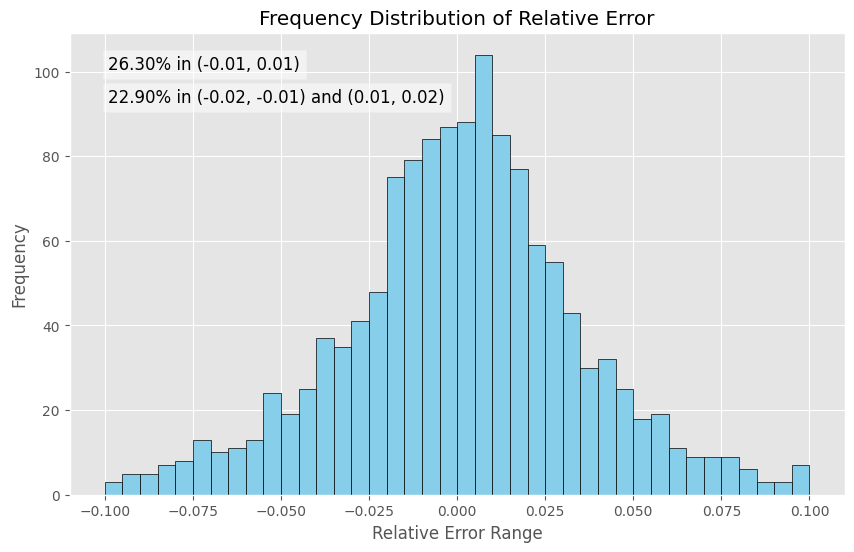

In [20]:
# Compute the signed relative error: (prediction - actual) / (actual + epsilon)
relative_error_signed = (predictions - y_test) / (y_test + epsilon)

# Create bins from -0.1 to 0.1 with a step of 0.005
bins = np.arange(-0.1, 0.1 + 0.005, 0.005)

mask = (relative_error_signed >= -0.01) & (relative_error_signed <= 0.01)
count_in_range = np.sum(mask)
total_count = len(relative_error_signed)
percentage_in_range = (count_in_range / total_count) * 100

mask_range2 = ((relative_error_signed >= -0.02) & (relative_error_signed < -0.01)) | ((relative_error_signed > 0.01) & (relative_error_signed <= 0.02))
count_in_range2 = np.sum(mask_range2)
percentage_in_range2 = (count_in_range2 / total_count) * 100

plt.figure(figsize = (10, 6))
plt.hist(relative_error_signed.flatten(), bins = bins, color = 'skyblue', edgecolor = 'black')
plt.xlabel("Relative Error Range")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Relative Error")
tag_text = f"{percentage_in_range:.2f}% in (-0.01, 0.01)"
plt.text(0.05, 0.95, tag_text, transform = plt.gca().transAxes, fontsize = 12, verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.5))
tag_text2 = f"{percentage_in_range2:.2f}% in (-0.02, -0.01) and (0.01, 0.02)"
plt.text(0.05, 0.88, tag_text2, transform = plt.gca().transAxes, fontsize = 12, verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.5))
plt.show()

# Saving the model
And load the model:

In [21]:
joblib.dump(clf, 'stock_prediction_model.pkl')
loaded_model = joblib.load('stock_prediction_model.pkl')

Store the loaded model into clf for education purposes

In [22]:
clf = loaded_model

# Getting the prediction for the shifted days that has no answers.
And print the result:

In [23]:
forecast_set = clf.predict(X_lately)
print("Forecast result: " + str(forecast_set) + "\n" + "With the accuracy of: " + str(custom_accuracy) + "\n" + "Forecast out of " + str(forecast_out) + " days.")

Forecast result: [9.68047182 9.61429584]
With the accuracy of: 0.26304347826086955
Forecast out of 2 days.


# Merging all sections together for matplot lib

1. dates_train
2. dates_test
3. dates_lately

This being the X axis

and


1. y_train
2. y_test
3. forcast out

This being the Y axis

In [24]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
forecast_set = forecast_set.reshape(-1, 1)

dates_train = np.array(dates_train).reshape(-1, 1)
dates_test  = np.array(dates_test).reshape(-1, 1)
dates_lately = np.array(dates_lately).reshape(-1, 1)

all_dates = np.vstack((dates_train, dates_test, dates_lately)).flatten()
all_targets = np.vstack((y_train, y_test, forecast_set)).flatten()

df_combined = pd.DataFrame({
    "Date": all_dates,
    "Closing Price": all_targets
})

df_combined.set_index('Date', inplace = True)
df_combined.sort_values(by = 'Date', inplace = True)
display(df_combined)


,Closing Price
Date,
1995-02-28,1.240000
1995-03-01,1.350000
1995-03-02,1.600000
1995-03-03,1.610000
1995-03-06,1.610000
...,...
2025-03-03,9.350000
2025-03-04,9.660000
2025-03-05,9.630000


## Using matplotlib to Show the graph

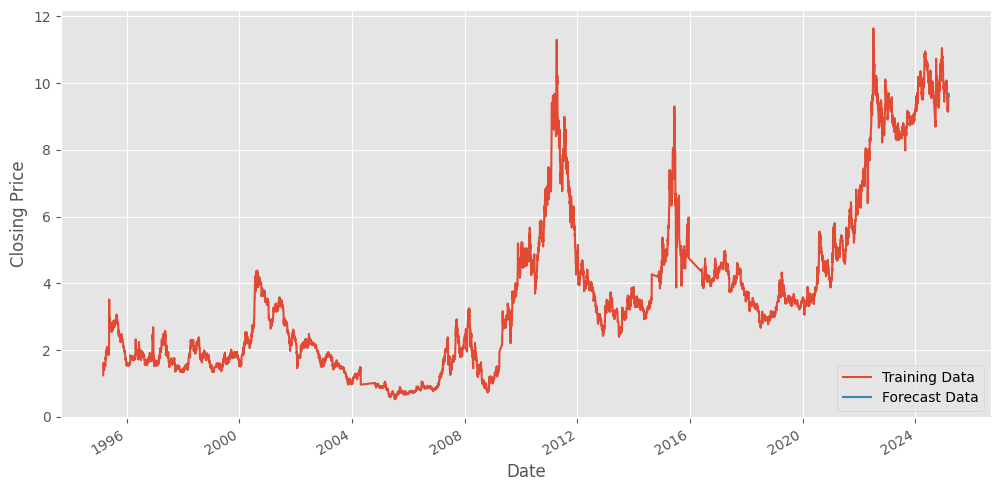

In [25]:
plt.figure(figsize = (12, 6))
df_combined['Closing Price'][:-forecast_out].plot(label = 'Training Data')
df_combined['Closing Price'][-forecast_out:].plot(label = 'Forecast Data')
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [26]:
df_combined.info()
df_combined.columns
df_combined.describe()
df_combined.sort_values(by = 'Closing Price', ascending = False)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6901 entries, 1995-02-28 to 2025-03-07
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  6901 non-null   float64
dtypes: float64(1)
memory usage: 107.8 KB


,Closing Price
Date,
2022-07-05,11.64
2022-07-06,11.55
2011-04-07,11.30
2024-12-10,11.05
2022-07-08,11.03
...,...
2005-07-06,0.54
2005-07-19,0.54
2005-07-14,0.53
